Preprocessing Data

In [20]:
# Conditionals

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset
file_path = "indian_diabetes.csv"
df = pd.read_csv(file_path)

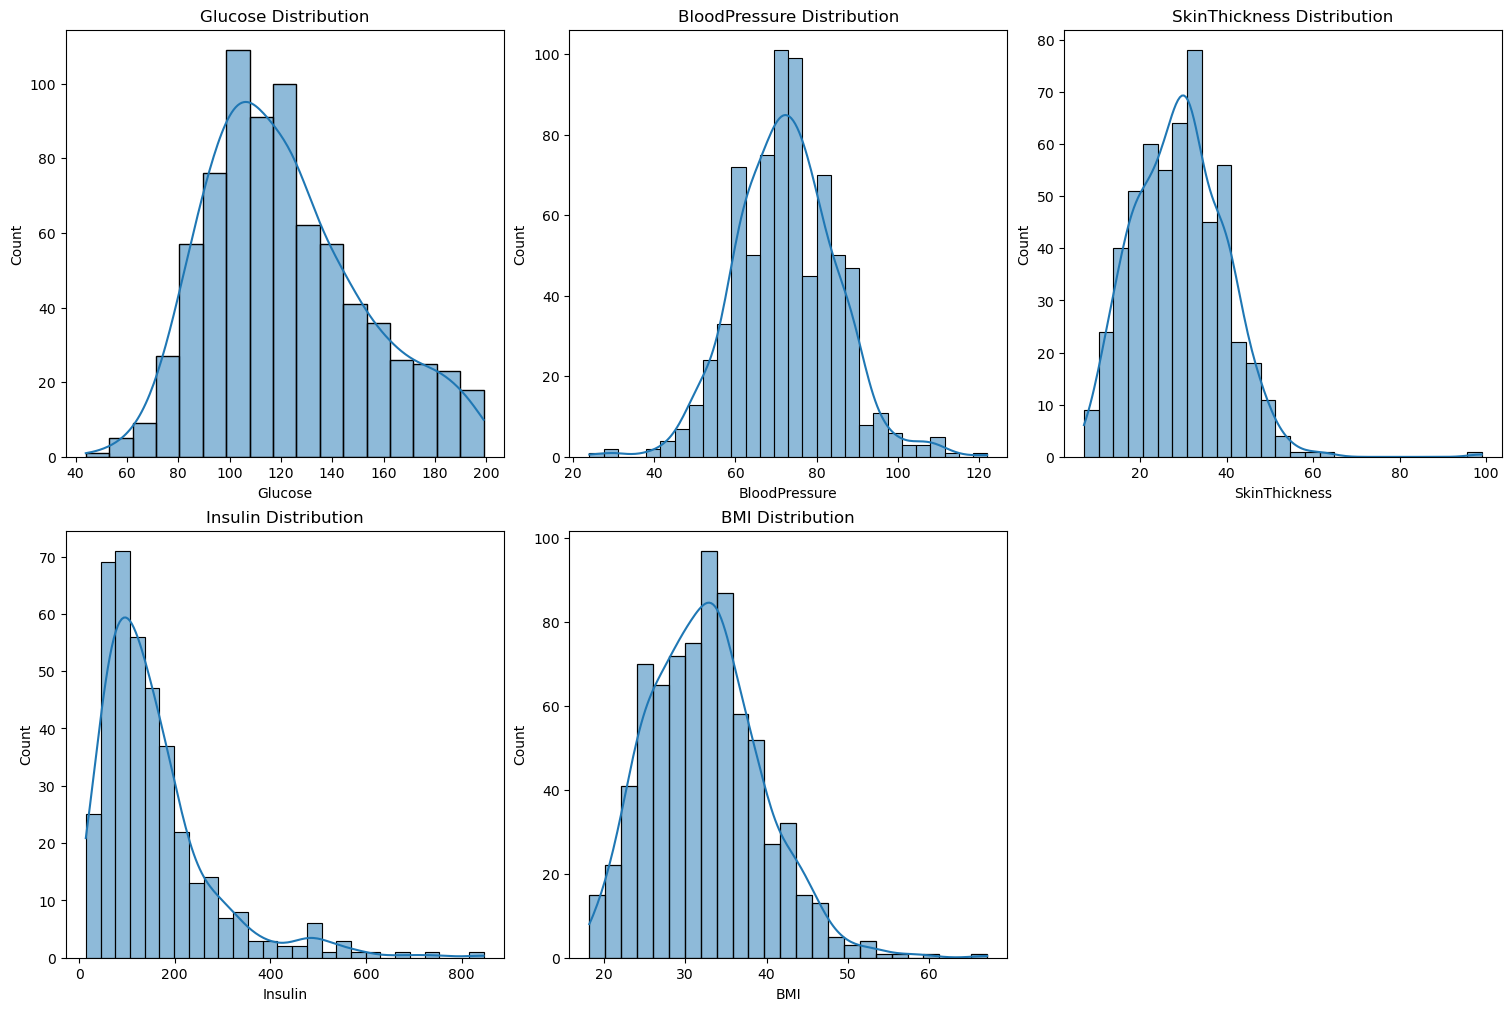

In [22]:
# Drop the 'Id' column 
# df.drop(columns=['Id'], inplace=True)

# Drop the 'DiabetesPedigreeFunction' column 
df.drop(columns=['DiabetesPedigreeFunction'], inplace=True)

# Columns where zero values are likely missing values
zero_replace_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Create subplots with 3 columns per row
fig, axes = plt.subplots((len(zero_replace_cols) + 2) // 3, 3, figsize=(15, 10), constrained_layout=True)

# Flatten axes for easy iteration
for ax, col in zip(axes.flat, zero_replace_cols):
    sns.histplot(df[col].replace(0, np.nan), kde=True, ax=ax)
    ax.set_title(f"{col} Distribution")

# Hide unused subplots
for ax in axes.flat[len(zero_replace_cols):]:
    ax.set_visible(False)

plt.show()

Replace zeros based on distribution analysis

In [23]:
# Use mean for Glucose and BloodPressure, median for others
mean_replace_cols = ['Glucose', 'BloodPressure']
median_replace_cols = ['SkinThickness', 'Insulin', 'BMI']

for col in mean_replace_cols:
    mean_value = df[col].replace(0, np.nan).mean()
    df[col] = df[col].replace(0, mean_value)

for col in median_replace_cols:
    median_value = df[col].replace(0, np.nan).median()
    df[col] = df[col].replace(0, median_value)

# Scale only selected numerical features (EXCLUDING Age)
columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Convert back to DataFrame
df_scaled_df = df.copy()  # Now df_scaled_df is properly defined

# Save preprocessed data
df_scaled_df.to_csv("indian_diabetes_preprocessed.csv", index=False)
